In [310]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [311]:
# Parameters

V_m = 136
L = 11
rho_m = 250
nx = 51
dt = 0.001

x = np.linspace(0, L, nx)
dx = L/(nx-1)
print(dx)

# Initial Conditions

rho0 = np.ones(nx)*20
rho0[10:20] = 50

# Boundary Conditions

r0 = 20

#print(rho0)

0.22


In [312]:
def F(rho, rho_max, Vmax):
    
    F = Vmax*rho*(1-(rho/rho_max))
    
    return F

In [313]:
def traffic_flux(x,nx,dx,dt,rho,rho_max,r0,V_max,t_f):
    
    
    nt = int((t_f/60)/dt) + 1
    v = np.zeros(nx)
    r = np.ones(nx)
   
    for i in range(nt):
        r = rho.copy()
        for j in range(1,nx):
            rho[j] = r[j] - dt/dx*(F(r[j],rho_max,V_max)-F(r[j-1],rho_max,V_max))
            rho[0] = r0
        
        for j in range(nx):
            v[j] = F(rho[j],rho_max,V_max)/rho[j]
            
            
    plt.figure
    plt.plot(x,v)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.show()
        
    return rho, r, v

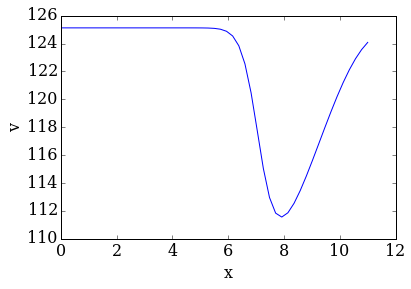

In [314]:
rho, r, v = traffic_flux(x,nx,dx,dt,rho0,rho_m,r0,V_m,3)

In [315]:
print(min(v)*1000/3600)

30.988747028


In [316]:
print(np.sum(v)/nx * 1000/3600)

33.8744962651


In [317]:
#plt.plot(x,v)